### 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

In [3]:
"""
50. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ、300次元）をダウンロードし、
”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。
"""
from gensim.models import KeyedVectors

file = 'data/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(file, binary=True)
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [4]:
"""
51. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ。
"""
print(model.similarity('United_States', 'U.S.'))


0.73107743


In [5]:
"""
52. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と、その類似度を出力せよ。
"""
top_10 = model.most_similar("United_States",topn=10)
print("United States とコサイン類似度が高い10語")
for i, word in enumerate(top_10):
    print(f"{i+1} : {word[0]}, 類似度 : {word[1]}")

United States とコサイン類似度が高い10語
1 : Unites_States, 類似度 : 0.7877248525619507
2 : Untied_States, 類似度 : 0.7541370987892151
3 : United_Sates, 類似度 : 0.7400724291801453
4 : U.S., 類似度 : 0.7310774326324463
5 : theUnited_States, 類似度 : 0.6404393911361694
6 : America, 類似度 : 0.6178410053253174
7 : UnitedStates, 類似度 : 0.6167312264442444
8 : Europe, 類似度 : 0.6132988929748535
9 : countries, 類似度 : 0.6044804453849792
10 : Canada, 類似度 : 0.601906955242157


In [6]:
"""
53. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き、”Athens”のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。
"""
top_10 = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
print("コサイン類似度が高い10語")
for i, word in enumerate(top_10):
    print(f"{i+1} : {word[0]}, 類似度 : {word[1]}")

コサイン類似度が高い10語
1 : Greece, 類似度 : 0.6898480653762817
2 : Aristeidis_Grigoriadis, 類似度 : 0.560684859752655
3 : Ioannis_Drymonakos, 類似度 : 0.5552908778190613
4 : Greeks, 類似度 : 0.545068621635437
5 : Ioannis_Christou, 類似度 : 0.5400862097740173
6 : Hrysopiyi_Devetzi, 類似度 : 0.5248445272445679
7 : Heraklio, 類似度 : 0.5207759737968445
8 : Athens_Greece, 類似度 : 0.516880989074707
9 : Lithuania, 類似度 : 0.5166865587234497
10 : Iraklion, 類似度 : 0.5146791338920593


In [ ]:
"""
54. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし、
国と首都に関する事例（: capital-common-countriesセクション）に対して、  <- 無視
vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、
そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。
"""
from tqdm import tqdm 
file_path = 'data/questions-words.txt.crdownload'
output_file_path = 'data/questions-words_similar.txt'
data = {}
with open(file_path, 'r') as file:
    category = None
    for line in file:
        line = line.strip()

        if line.startswith(':'):
            category = line[1:].strip()
            data[category] = []
        elif line:
            words = line.split()
            data[category].append(words)

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    for category, word_list in data.items():
        for words in word_list:
            top = model.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)
            result_line = f"{category}\t{words[0]} {words[1]} {words[2]} {words[3]}\t{top[0][0]}\t{top[0][1]}\n"
            output_file.write(result_line)





In [10]:
"""
55. アナロジータスクでの正解率
54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

文法的アナロジー（syntactic analogy）カテゴリ名がgramから始まる評価データ
意味的アナロジー（semantic analogy）：それ以外のカテゴリが意味的アナロジー
"""

file_path = 'data/questions-words_similar.txt'

syn_total = 0
syn_correct = 0
sem_total = 0
sem_correct = 0

with open(file_path, 'r') as file:
    for line in file:
        tmp = line.split("\t")
        category=tmp[0]
        true = tmp[1].split()[3]
        pred = tmp[2]

        if category.startswith("gram"):
            syn_total += 1
            if true == pred:
                syn_correct += 1
        else:
            sem_total += 1
            if true == pred:
                sem_correct += 1

print(f"意味的アナロジーの正解率：{sem_correct/sem_total}")
print(f"文法的アナロジーの正解率：{syn_correct/syn_total}")



意味的アナロジーの正解率：0.7308602999210734
文法的アナロジーの正解率：0.7400468384074942


In [11]:
"""
56. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし、
単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間の
スピアマン相関係数を計算せよ。
"""
import pandas as pd

file_path = "wordsim353/combined.csv"
df = pd.read_csv(file_path, encoding="utf-8") 
similarity_list = []
for i, row in df.iterrows():
    word1 = row["Word 1"]
    word2 = row["Word 2"]
    similarity_list.append(model.similarity(word1,word2))

df["model"] = similarity_list

df["Human_Rank"] = df["Human (mean)"].rank(ascending=False)
df["model_Rank"] = df["model"].rank(ascending=False)
df.head()

from scipy.stats import spearmanr
human_rank = [row["Human_Rank"] for i, row in df.iterrows()]
model_rank = [row["model_Rank"] for i, row in df.iterrows()]

correlation, pvalue = spearmanr(human_rank, model_rank)
print(correlation)

    

0.7000166486272194


In [12]:
"""
57. k-meansクラスタリング
国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

"""
import pycountry
import numpy as np

model_keys = set(model.key_to_index.keys())

countries = [country.name.replace(" ", "_") for country in pycountry.countries if country.name.replace(" ", "_") in model_keys]

country_features = {name: model[name] for name in countries}

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,random_state=0)

features = np.array(list(country_features.values()))
y_km = km.fit_predict(features)

clusters = {i: [] for i in range(5)}

for country, cluster in zip(countries, y_km):
    clusters[cluster].append(country)

for cluster, country_list in clusters.items():
    print(f"Cluster {cluster}: {', '.join(country_list)}")


Cluster 0: Andorra, Switzerland, Faroe_Islands, Liechtenstein, Monaco, San_Marino
Cluster 1: Åland_Islands, Albania, Armenia, Austria, Azerbaijan, Belgium, Bulgaria, Belarus, Cyprus, Czechia, Germany, Denmark, Spain, Estonia, Finland, France, Georgia, Greece, Croatia, Hungary, Ireland, Iceland, Italy, Kazakhstan, Lithuania, Luxembourg, Latvia, Malta, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovakia, Slovenia, Sweden, Türkiye, Ukraine
Cluster 2: Afghanistan, United_Arab_Emirates, Argentina, Australia, Bangladesh, Bahrain, Saint_Barthélemy, Brazil, Brunei_Darussalam, Bhutan, Bouvet_Island, Canada, Chile, China, Colombia, Costa_Rica, Cuba, Dominican_Republic, Ecuador, Egypt, United_Kingdom, Greenland, Guatemala, Hong_Kong, Honduras, Haiti, Indonesia, India, Iraq, Israel, Jersey, Jordan, Japan, Kyrgyzstan, Cambodia, Kuwait, Lebanon, Libya, Sri_Lanka, Macao, Morocco, Mexico, Myanmar, Mongolia, Malaysia, Nicaragua, Nepal, Oman, Pakistan, Panama, Peru, Philippines,

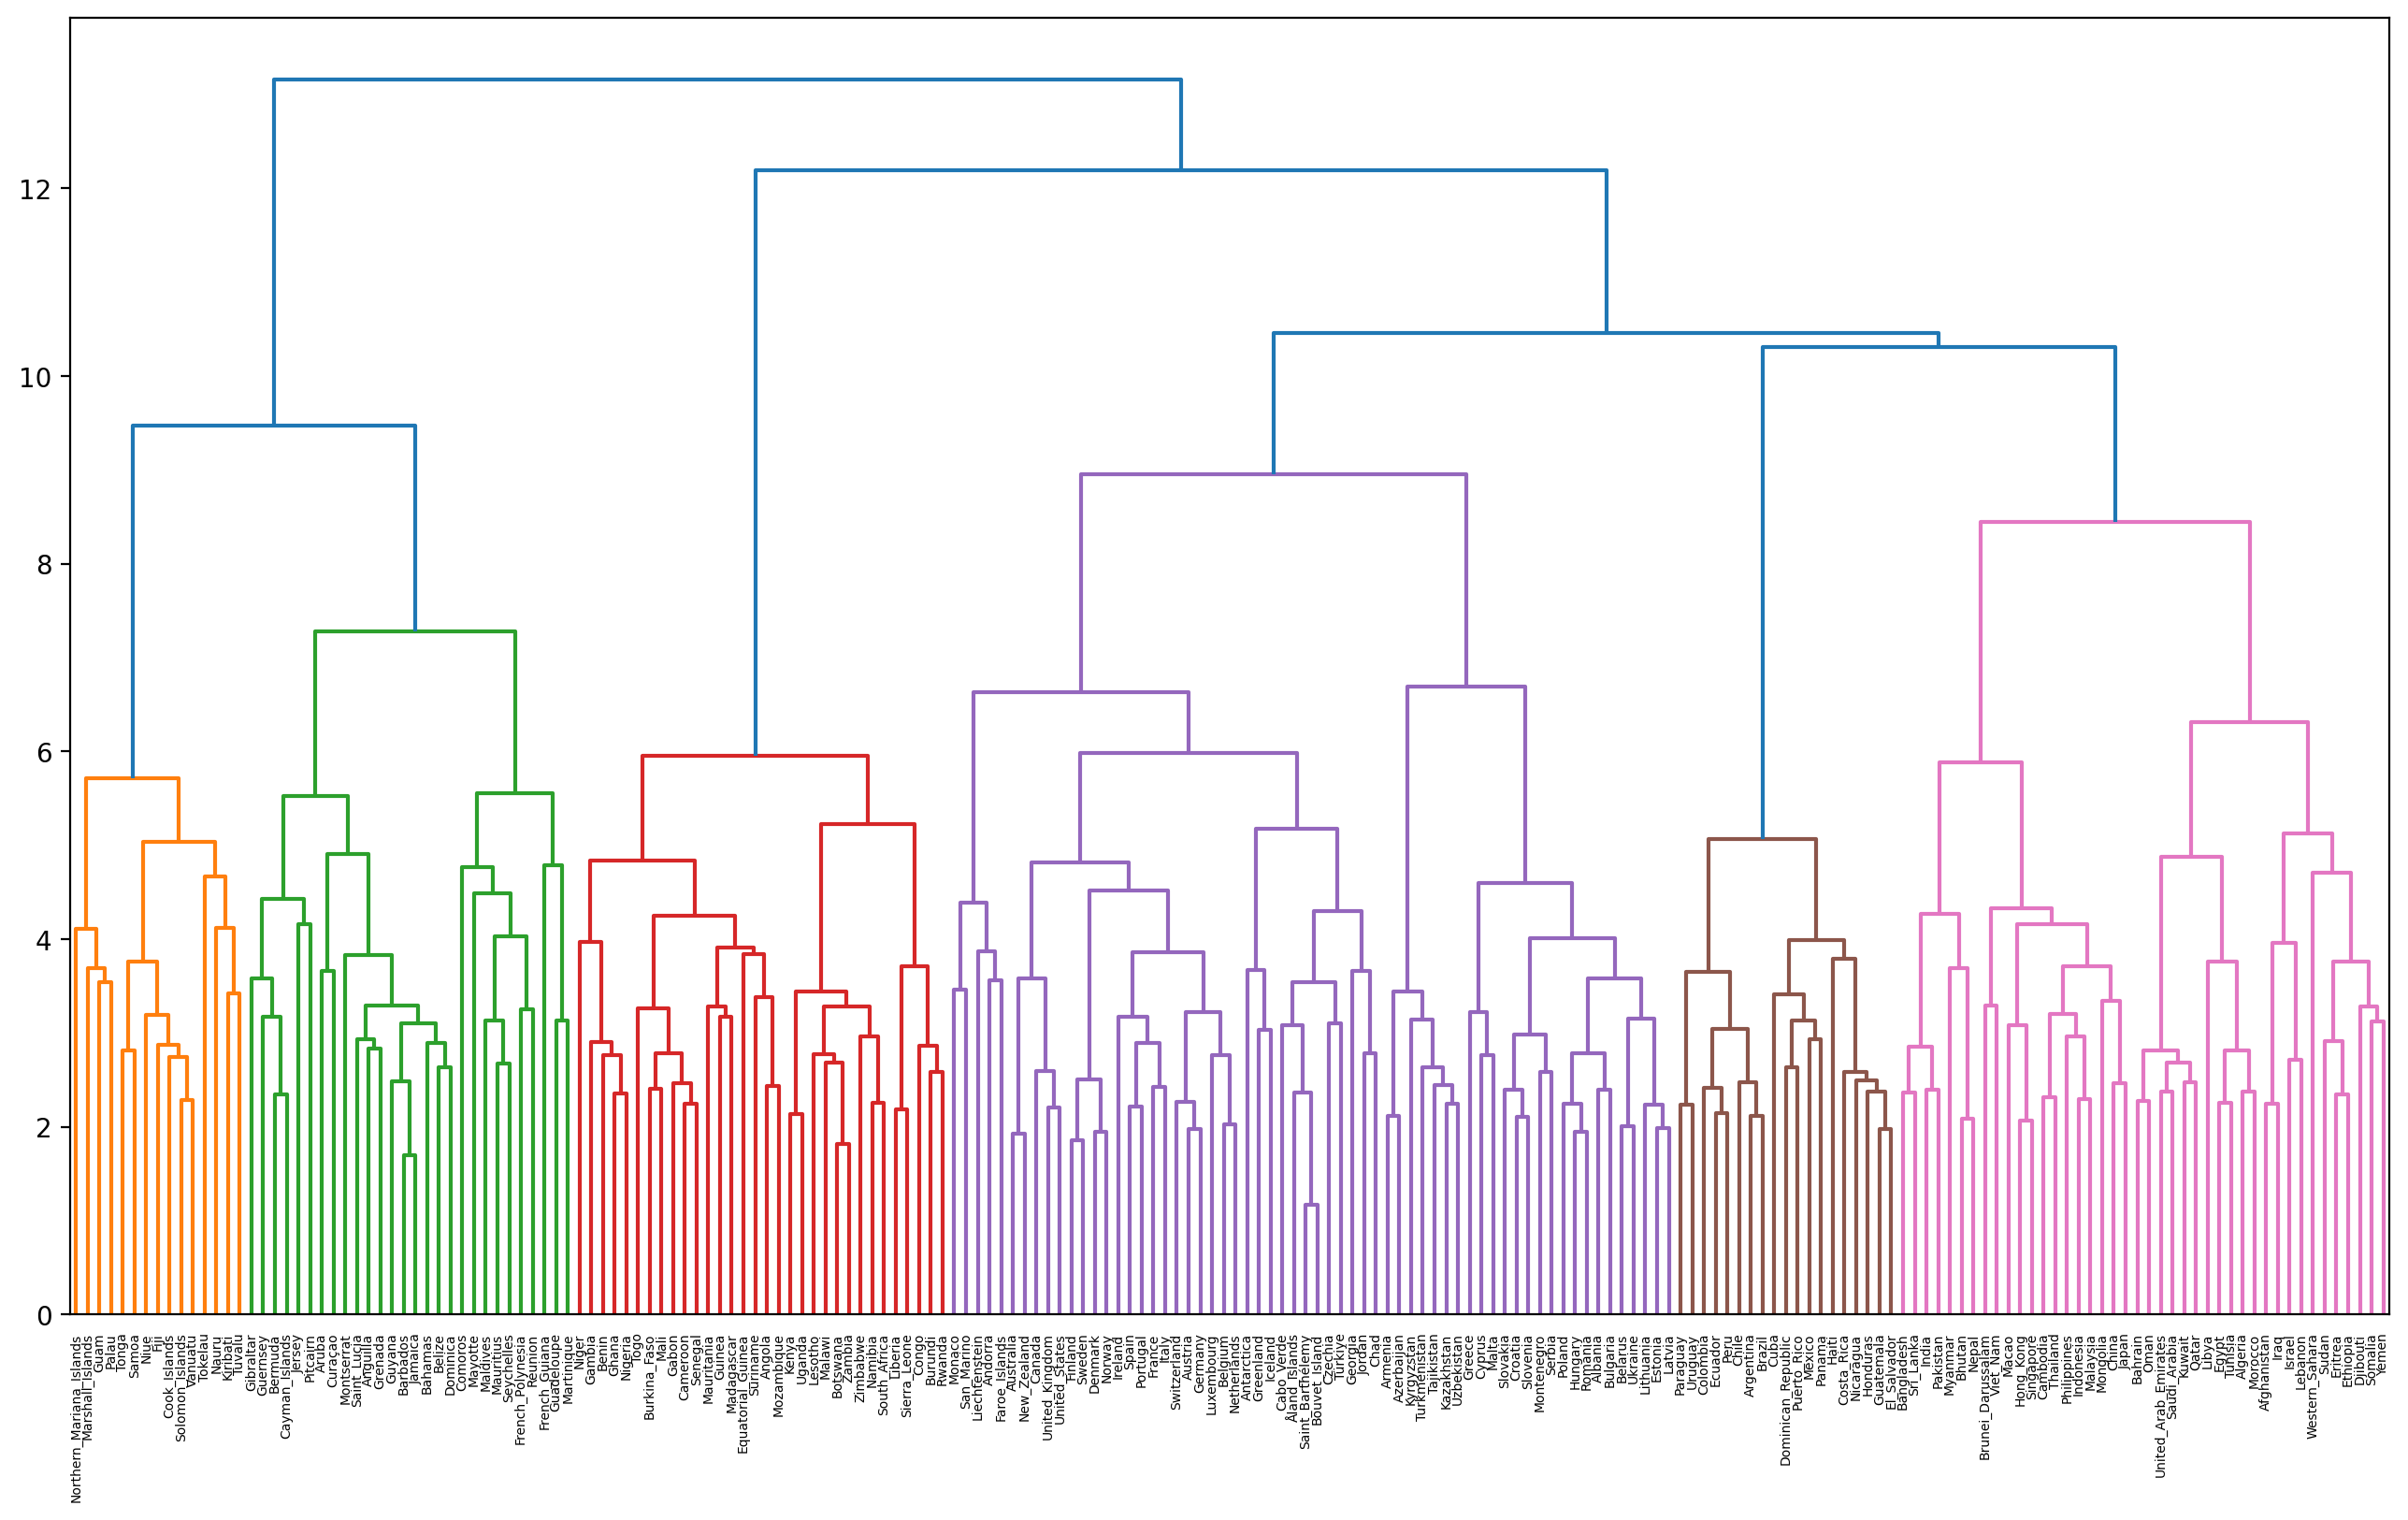

In [ ]:
"""
58. Ward法によるクラスタリング
国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。
"""
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_result = linkage(features, method='ward', metric='euclidean')

plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries)
plt.show()

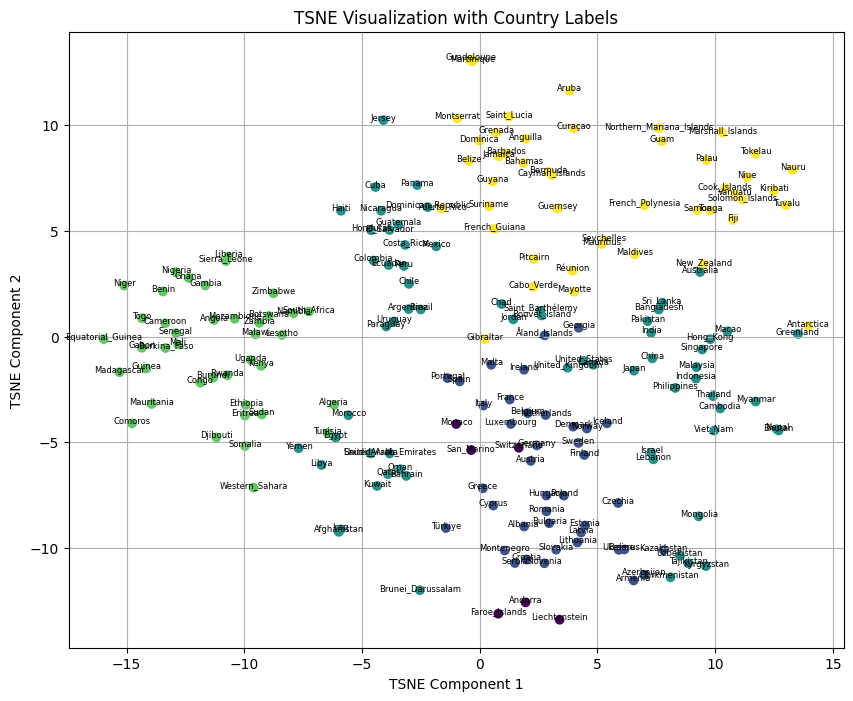

In [14]:
"""
59. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。
"""
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 123)
X_embedded = tsne.fit_transform(np.array(features))

plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_km, label="Data Points")

for i, country in enumerate(countries):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], country, fontsize=6, ha='center')

plt.title("TSNE Visualization with Country Labels")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.grid(True)
plt.show()